In [1]:
from sklearn.datasets import make_regression

In [103]:
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.pyplot as plt 
import numpy as np

In [113]:
import seaborn as sns
sns.set(style='ticks', palette='Set2')

In [17]:
X, y = make_regression(n_features=1, bias=1, noise=1.5)

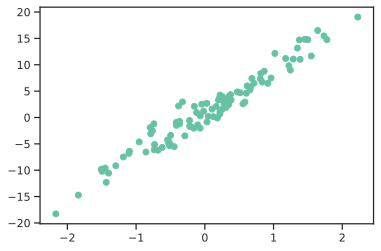

In [19]:
plt.scatter(X[:,0], y)

In [48]:
_y = y.copy()
_y[-5] = 50
_y[-10] = 30
_y[-30] = 33
_y[-40] = 20
_y[-80] = 120

In [77]:
X[3:10, 0] = 10

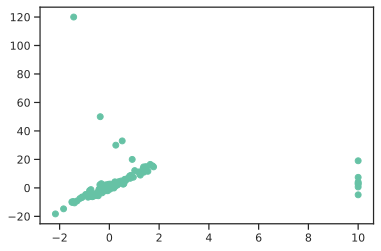

In [78]:
plt.scatter(X[:,0], _y)

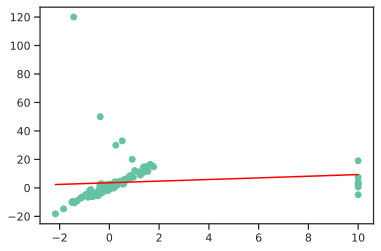

In [79]:
from sklearn.linear_model import LinearRegression
m1 = LinearRegression()
m1.fit(X, _y)
plt.scatter(X[:,0], _y)
plt.plot(X[:,0], m1.predict(X), c='r')

In [80]:
m1.coef_

array([0.57520358])

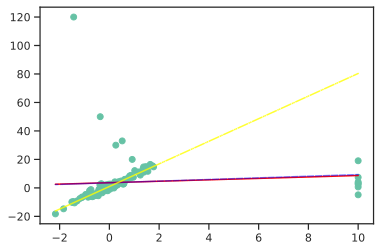

In [81]:
from sklearn.linear_model import Ridge
m2 = Ridge(alpha=100)
m2.fit(X, _y)
from sklearn.linear_model import RANSACRegressor
m3 = RANSACRegressor()
m3.fit(X, _y)

plt.scatter(X[:,0], _y)
plt.plot(X[:,0], m2.predict(X), c='r')
plt.plot(X[:,0], m1.predict(X), c='b', alpha=0.5, ls='--')
plt.plot(X[:,0], m3.predict(X), c='yellow', alpha=0.8, ls='-.')

In [ ]:
mean: 76  std: 425

In [88]:
x = X[:,0]

In [91]:
from sklearn.neighbors import LocalOutlierFactor

In [119]:
l1 = LocalOutlierFactor(n_neighbors=20)

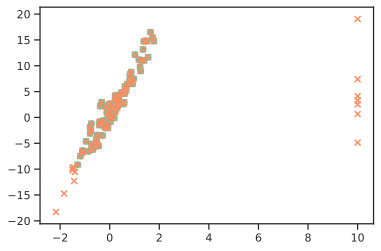

In [120]:
index = l1.fit_predict(X)

plt.scatter(x[np.where(index > 0)[0]], y[np.where(index > 0)[0]])
plt.scatter(x, y, marker='x')

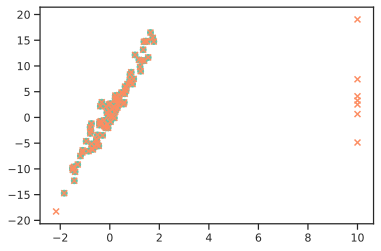

In [116]:
index = l1.fit_predict(X)

plt.scatter(x[np.where(index > 0)[0]], y[np.where(index > 0)[0]])
plt.scatter(x, y, marker='x')

In [122]:
s = pd.Series(x)

In [125]:
s.describe()

count    100.000000
mean       0.738246
std        2.688746
min       -2.168161
25%       -0.499857
50%        0.144625
75%        0.819738
max       10.000000
dtype: float64

In [126]:
def get_limits(x):
    #四分位数 IQR异常值检测 Tukeys test
    percentile = np.percentile(x,[0,25,50,75,100])
    IQR = percentile[3] - percentile[1]
    up_limit = percentile[3]+IQR*1.5
    down_limit = percentile[1]-IQR*1.5
    #超过上四分位+1.5倍IQR距离，或者下四分位-1.5倍IQR距离的点为异常值
    return down_limit, up_limit

In [127]:
get_limits(s)

(-2.4792482903213715, 2.7991296115680124)

In [131]:
np.where(x < 2.8)[0]

(array([ 0,  1,  2, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
        41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
        58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
        75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
        92, 93, 94, 95, 96, 97, 98, 99]),)

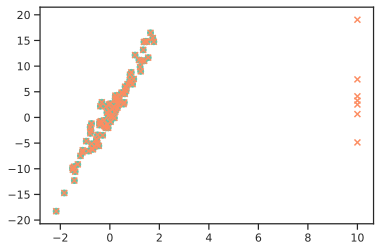

In [132]:
plt.scatter(x[np.where(x < 2.8)[0]], y[np.where(x < 2.8)[0]])
plt.scatter(x, y, marker='x')